In [58]:
# Copied from github
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sns
import datetime
import calendar
import statistics
# Read the data from the file, and create a DataFrame object.
raw_data_movies = pd.read_csv("tmdb_5000_movies.csv")

# Reformat the columns contain dictionaries as a string list.
raw_data_movies["genres"] = raw_data_movies["genres"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["keywords"] = raw_data_movies["keywords"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_companies"] = raw_data_movies["production_companies"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_countries"] = raw_data_movies["production_countries"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["spoken_languages"] = raw_data_movies["spoken_languages"].apply(lambda x : [i["name"] for i in eval(x)])

# Read the data from the file, and create a DataFrame object.
raw_data_credits = pd.read_csv("tmdb_5000_credits.csv")

# Reformat the columns contain dictionaries as a string list.
raw_data_credits["cast"] = raw_data_credits["cast"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_credits["crew"] = raw_data_credits["crew"].apply(lambda x : [i["job"] + " : " + i["name"] for i in eval(x)])

# Merge two datasets base on the movies' id number, and drop the duplicated columns.
raw_data = pd.merge(raw_data_movies, raw_data_credits.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)

# Clean the dataset, and remove the outliers.
data = raw_data[(raw_data["budget"] > 0) &
                (raw_data["original_title"] is not np.nan) &
                (raw_data["popularity"] > 0) & 
                (raw_data["production_companies"].apply(len) != 0) &
                (raw_data["production_countries"].apply(len) != 0) & 
                (raw_data["release_date"] is not np.nan) &
                (raw_data["revenue"] > 0) &
                (raw_data["runtime"] > 0) &
                (raw_data["cast"].apply(len) != 0) & 
                (raw_data["crew"].apply(len) != 0)]

# Gets all genres in the dataset
unique_genre = {genre for l in data["genres"] for genre in l}

In [63]:
# My Code
from sklearn.linear_model import LinearRegression
import math
print("")
print("Here we sort all values of budgets (X) and revenue (Y) into two dictionaries with key values of the specific genre and the values of budget or revenue as lists depending on dictionary. In this process, repeats of the same movie does occur since most movies have more than a single genre. Additionally, using these lists would better allow us to plot the scatter plot in the future. In hindsight after the first run, the points and the line's visualization did not give a good understanding of approximation, hence the application of Napier Logarithms permitted a better visualization of data. This is why the log budget and revenue is used.")

allX = {}
allY = {}
for ug in unique_genre:
    x = []
    y = []
    for l in range (0, len(data["genres"])):
        if (data["genres"].get(l) and data["revenue"].get(l) and ug in data["genres"].get(l)):
            x.append(math.log(data["budget"].get(l)))
            y.append(math.log(data["revenue"].get(l)))
    allX[ug] = x
    allY[ug] = y
    

Here we sort all values of budgets (X) and revenue (Y) into two dictionaries with key values of the specific genre and the values of budget or revenue as lists depending on dictionary. In this process, repeats of the same movie does occur since most movies have more than a single genre. Additionally, using these lists would better allow us to plot the scatter plot in the future. In hindsight after the first run, the points and the line's visualization did not give a good understanding of approximation, hence the application of Napier Logarithms permitted a better visualization of data. This is why the log budget and revenue is used.


In [64]:
print("In the following actions, we make sure that all genres have budgets and revenues by discarding the entire genre since an empty list of budget and revenues would result in an empty scatter plot.")
for g in unique_genre:
    if allX.get(g) == []:
        allX.pop(g)
    if allY.get(g) == []:
        allY.pop(g)


In the following actions, we make sure that all genres have budgets and revenues by discarding the entire genre since an empty list of budget and revenues would result in an empty scatter plot.


Since we have so many genres, we loop through all key values of both dictionaries to plot the scatterplot as well as labeling both axises and the name of the plot.


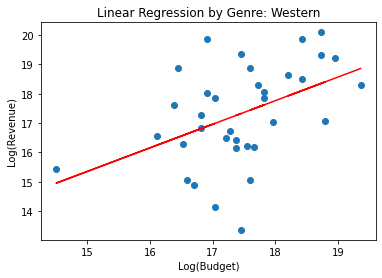

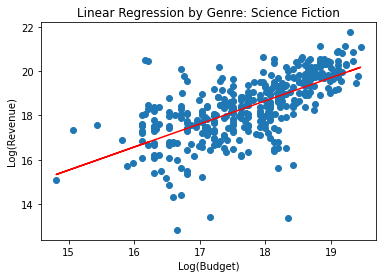

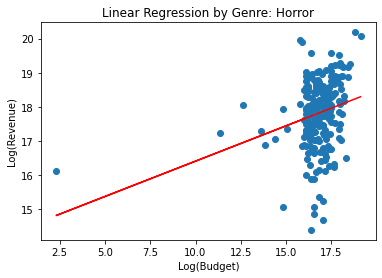

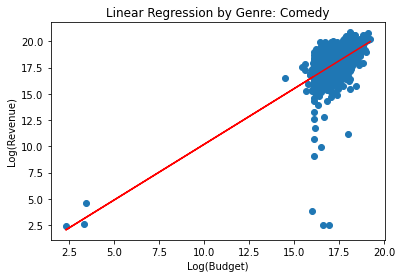

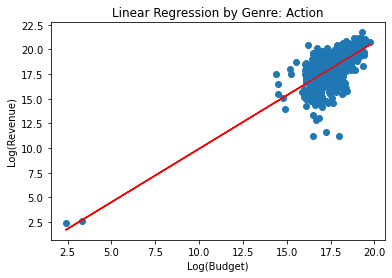

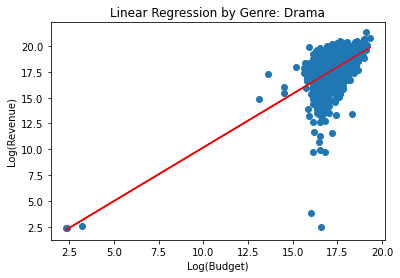

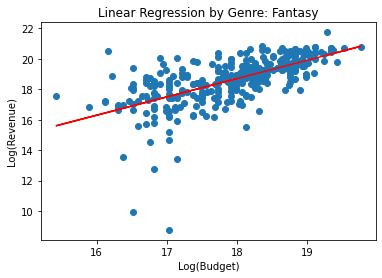

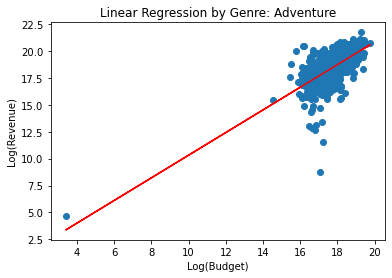

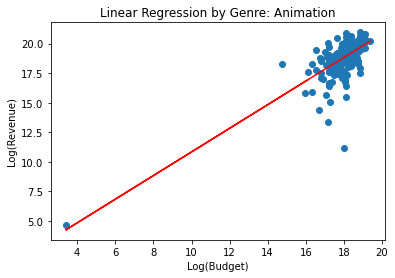

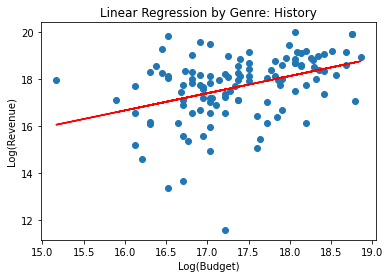

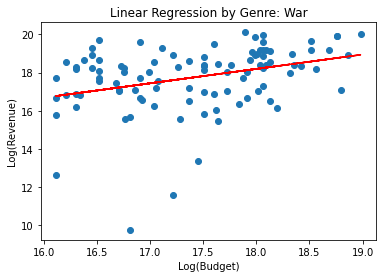

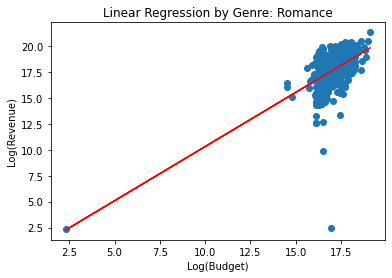

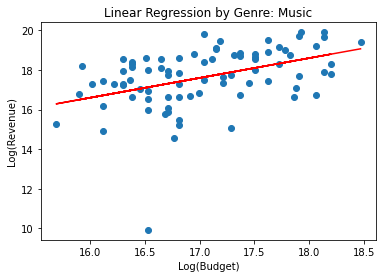

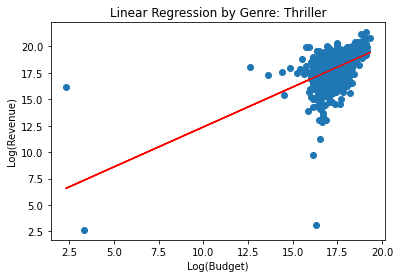

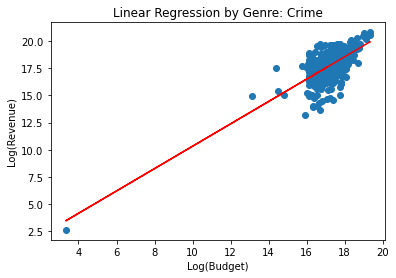

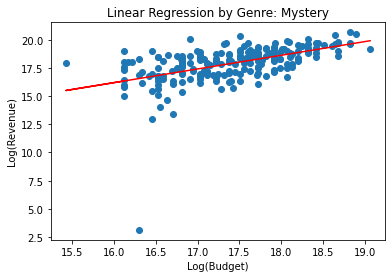

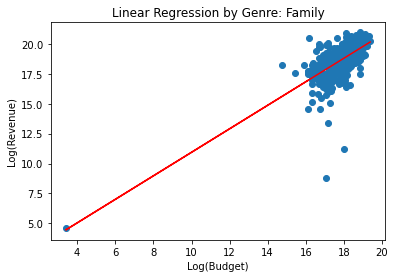

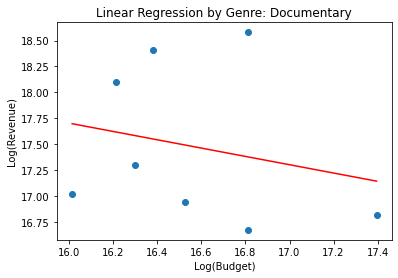

In [65]:
print("Since we have so many genres, we loop through all key values of both dictionaries to plot the scatterplot as well as labeling both axises and the name of the plot.")
for g in unique_genre:
    if(allX.get(g) and allY.get(g)):
        x = np.array(allX.get(g)).reshape((-1, 1))
        y = np.array(allY.get(g))
        linreg = LinearRegression()
        linreg.fit(x,y)
        y_pred = linreg.predict(x)
        pyplt.scatter(x,y)
        pyplt.plot(x, y_pred, color="red")
        pyplt.xlabel("Log(Budget)")
        pyplt.ylabel("Log(Revenue)")
        title = "Linear Regression by Genre: " + g
        pyplt.title(title)
        pyplt.show()